### Goal: Perform a one-way ANOVA on Opioid Mortality Rate with regions as the Groups

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import pingouin as pg
from pingouin import pairwise_ttests

### Import opioid mortality rate dataset

In [2]:
health04_S_file_path = "../Resources/Health04/Health04_S.csv"
mortality_data = pd.read_csv(health04_S_file_path)
mortality_df = pd.DataFrame(mortality_data)
mortality_df.head(3)

,G_STATEFP,STATEFP,st_abb,st_name,opPrscRt19,prMisuse19,odMortRt14,odMortRt15,odMortRt16,odMortRt17,odMortRt18,odMortRt19,odMortRtAv
0,G01,1,AL,Alabama,39.1,4.55,15.2,15.7,16.2,18.0,16.6,16.3,16.33
1,G02,2,AK,Alaska,85.8,3.99,16.8,16.0,16.8,20.2,14.6,17.8,17.03
2,G04,4,AZ,Arizona,80.9,3.80,18.2,19.0,20.3,22.2,23.8,26.8,21.72


### Create a dataframe with state abbreviation and opioid mortality rate from mortality_data

In [3]:
mort_df = mortality_df.loc[:,['st_abb', 'odMortRtAv']]
mort_df = mort_df.rename(columns={'st_abb' : 'State', 'odMortRtAv' : 'odMortRtAv'})
mort_df.head(5)

,State,odMortRtAv
0,AL,16.33
1,AK,17.03
2,AZ,21.72
3,AR,14.18
4,CA,12.18


### Import region dataset

In [4]:
region_file_path = "../Resources/Geographic/state_region.csv"
region_data = pd.read_csv(region_file_path)
region_df = pd.DataFrame(region_data).loc[:,['State Code', 'Region', 'Division']].rename(columns={'State Code' : 'State', 'Region' : 'Region', 'Division' : 'Division'})
region_df.head(5)

,State,Region,Division
0,AK,West,Pacific
1,AL,South,East South Central
2,AR,South,West South Central
3,AZ,West,Mountain
4,CA,West,Pacific


### Merge mort and region dfs

In [5]:
mort_region_df = pd.merge(region_df, mort_df, on="State", how="inner")
df = mort_region_df.copy()
df

,State,Region,Division,odMortRtAv
0,AK,West,Pacific,17.03
1,AL,South,East South Central,16.33
2,AR,South,West South Central,14.18
3,AZ,West,Mountain,21.72
4,CA,West,Pacific,12.18
5,CO,West,Mountain,16.78
6,CT,Northeast,New England,27.23
7,DC,South,South Atlantic,21.63
8,DE,South,South Atlantic,33.75
9,FL,South,South Atlantic,19.48


<AxesSubplot:title={'center':'odMortRtAv'}, xlabel='Region'>

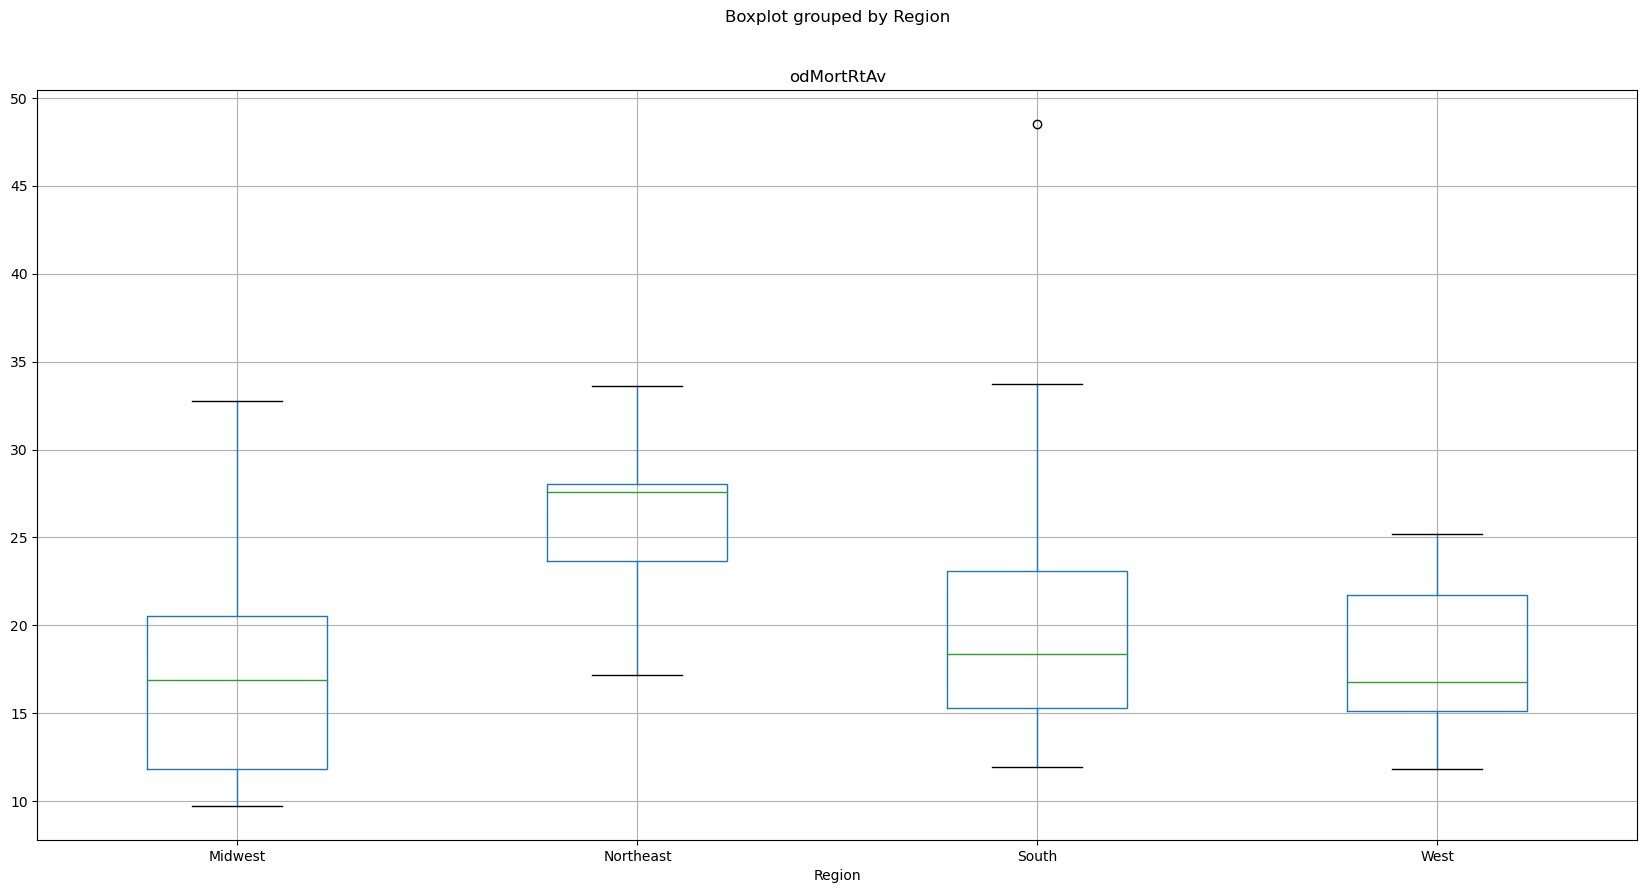

In [6]:
df.boxplot("odMortRtAv", by="Region", figsize=(20, 10))

In [7]:
regions = list(mort_region_df.Region.unique())
regions

['West', 'South', 'Northeast', 'Midwest']

In [10]:
WEST = df[df["Region"] == 'West']['odMortRtAv']
SOUTH = df[df["Region"] == 'South']['odMortRtAv']
NORTHEAST = df[df["Region"] == 'Northeast']['odMortRtAv']
MIDWEST = df[df["Region"] == 'Midwest']['odMortRtAv']

### One-way ANOVA

In [11]:
sts.f_oneway(WEST, SOUTH, NORTHEAST, MIDWEST)

F_onewayResult(statistic=3.8315543368069136, pvalue=0.015529712980994927)

### Post Hoc Test w/ pingouin

In [37]:
posthocs = pairwise_ttests(dv='odMortRtAv', between='Region', padjust='bonf', data=df, correction=True)
pairwise_ttests = posthocs.sort_values(['p-corr'], ascending = True).set_index('Contrast')

C:\Users\e.a.wright\anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [38]:
pairwise_ttests

,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
Contrast,,,,,,,,,,,,
Region,Northeast,West,False,True,4.013038,14.570421,two-sided,0.001191,0.007146,bonf,40.753,1.750510
Region,Midwest,Northeast,False,True,-3.518167,18.646004,two-sided,0.002352,0.014110,bonf,15.607,-1.453029
Region,Northeast,South,False,True,1.631955,23.643607,two-sided,0.115938,0.695629,bonf,0.963,0.556222
Region,South,West,False,True,1.554145,23.662455,two-sided,0.133424,0.800544,bonf,0.849,0.509264
Region,Midwest,South,False,True,-1.501509,26.996307,two-sided,0.144831,0.868987,bonf,0.808,-0.516257
Region,Midwest,West,False,True,-0.190138,18.979660,two-sided,0.851220,1.000000,bonf,0.373,-0.074793


In [39]:
pairwise_gameshowell = pg.pairwise_gameshowell(data=df, dv="odMortRtAv", between="Region").sort_values(['pval'], ascending = True).set_index('A')
pairwise_gameshowell

,B,mean(A),mean(B),diff,se,T,df,pval,hedges
A,,,,,,,,,
Northeast,West,26.381111,17.623846,8.757265,2.182203,4.013038,14.570421,0.005818,1.750510
Midwest,Northeast,17.202500,26.381111,-9.178611,2.608918,-3.518167,18.646004,0.011514,-1.453029
Northeast,South,26.381111,21.620588,4.760523,2.917067,1.631955,23.643607,0.380768,0.556222
South,West,21.620588,17.623846,3.996742,2.571666,1.554145,23.662455,0.422796,0.509264
Midwest,South,17.202500,21.620588,-4.418088,2.942433,-1.501509,26.996307,0.450534,-0.516257
Midwest,West,17.202500,17.623846,-0.421346,2.215997,-0.190138,18.979660,0.997475,-0.074793


### The Northeast is significantly different from the West and the Midwest in terms of regional opioid mortality rate (per 100,000).

### Follow-up research question: Why is the NE significantly different from both the West and the Midwest?

In [40]:
pairwise_ttests.to_csv("Results/odMortRtAv_regional_pairwise_ttest_results.csv")
pairwise_gameshowell.to_csv("Results/odMortRtAv_regional_pairwise_gameshowell_results.csv")